NAMA : Fathan Naufal R <br>
NIM : 211351054 <br>
KELAS : Informatika pagi B

1.Menentukan library yang di butuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

2.Load Dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fathannr","key":"251785e6198dd3e76baec0bac05dba0f"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d imtkaggleteam/breast-cancer

  0% 0.00/48.7k [00:00<?, ?B/s]
100% 48.7k/48.7k [00:00<00:00, 72.5MB/s]


In [5]:
# UNZIP

!mkdir breast-cancer
!unzip breast-cancer.zip -d breast-cancer
!ls breast-cancer

Archive:  breast-cancer.zip
  inflating: breast-cancer/breast-cancer-wisconsin-data_data.csv  
breast-cancer-wisconsin-data_data.csv


In [6]:
df = pd.read_csv('/content/breast-cancer/breast-cancer-wisconsin-data_data.csv')

In [7]:
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


fungsi untuk memunculkan data pada dataset dengan default 5 baris

In [8]:
df.shape

(569, 33)

df.shape berfungsi untuk melihat jumlah data pada data set dengan format (baris,kolom)

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df = df.drop('Unnamed: 32', axis=1)


Mendrop kolom yang berisi NaN agar tidak terjadi error pada saaat sedang memasukan kode classifier fit

In [12]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Fungsi ini di pakai untuk menghitung nilai yang ada di atribut "diagnosis", seperti menghitung jumlah pasien yang terkena kanker Benign(jinak) atau Malignant(Ganas) pada payudara

<Axes: >

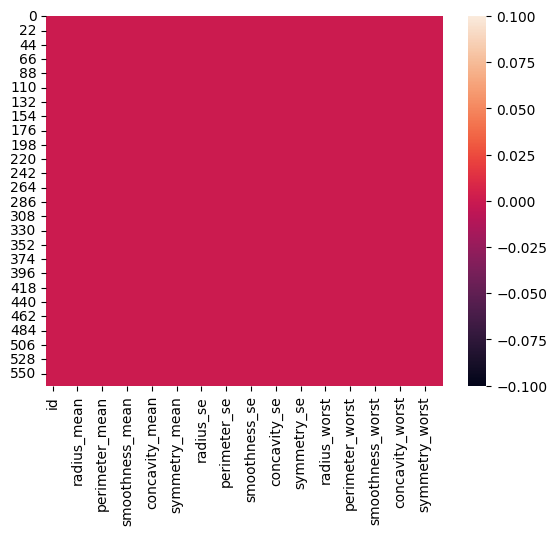

In [13]:
sns.heatmap(df.isnull())

<ipython-input-14-d92c41bf2ee0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

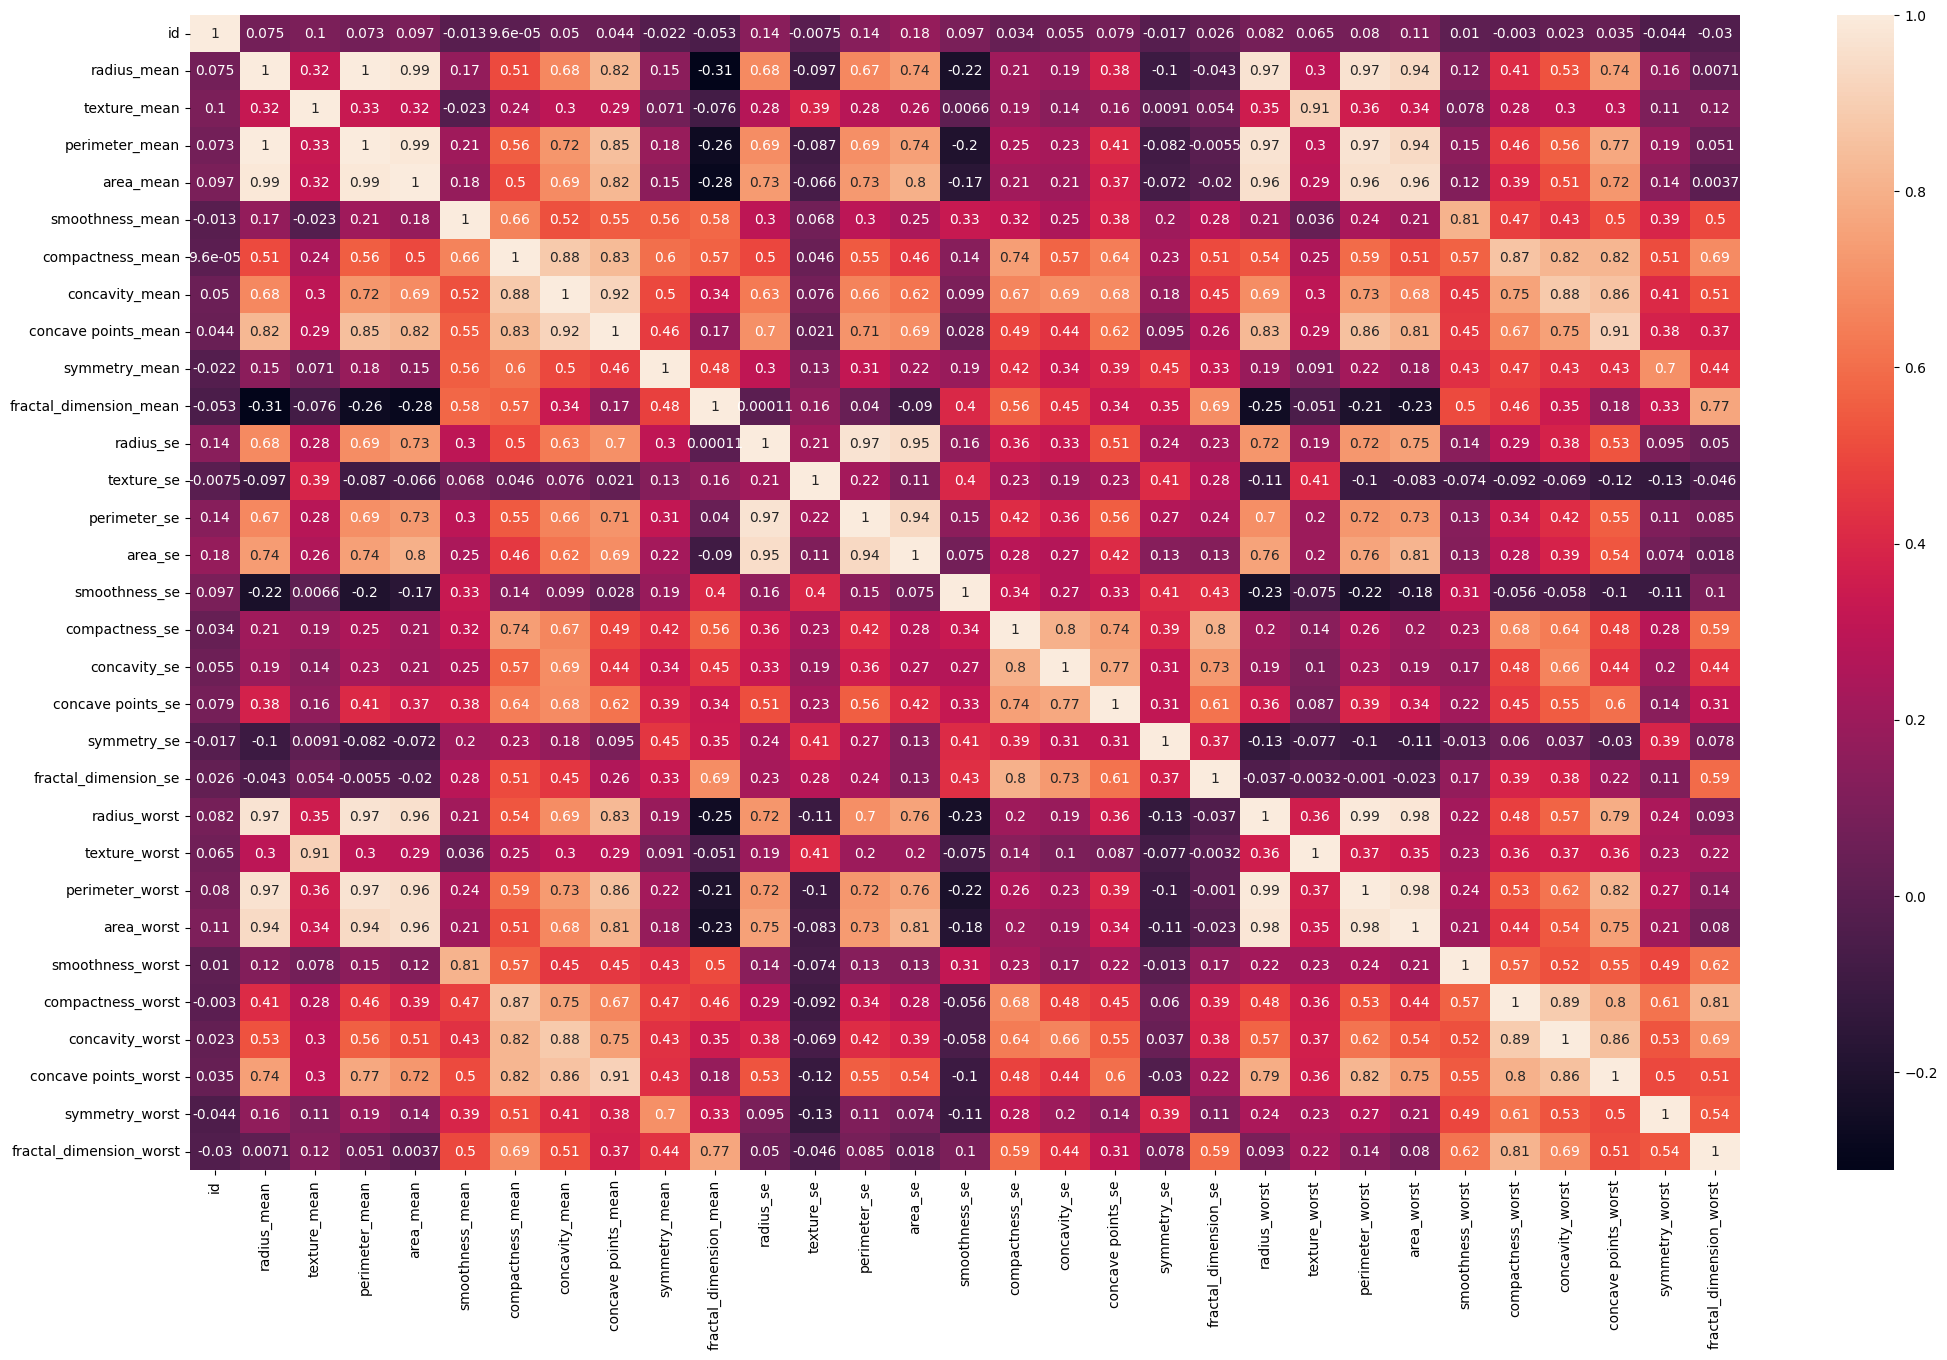

In [14]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

In [15]:
models = df.groupby('diagnosis').count()[['smoothness_mean']].sort_values(by='smoothness_mean',ascending=True).reset_index()
models = models.rename(columns={'smoothness_mean':'rata-rata_kelembutan'})

(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'B')])

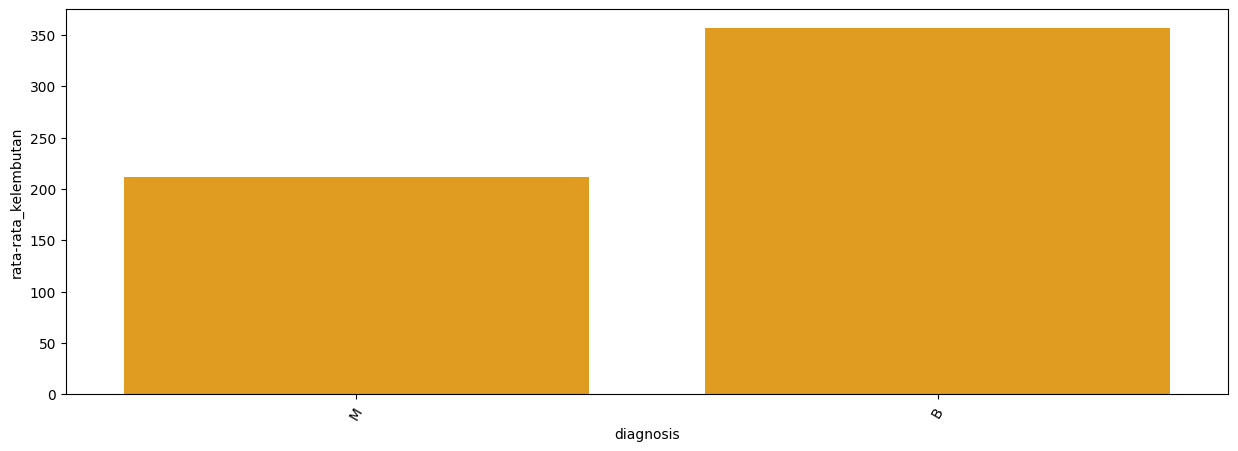

In [16]:
# B= benign(Jinak)
# M= Malignant(Ganas)

fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['diagnosis'], y=models['rata-rata_kelembutan'], color='orange')
plt.xticks(rotation=60)

<ipython-input-17-cfdc3eac4329>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['concavity_worst'])


<Axes: xlabel='concavity_worst', ylabel='Density'>

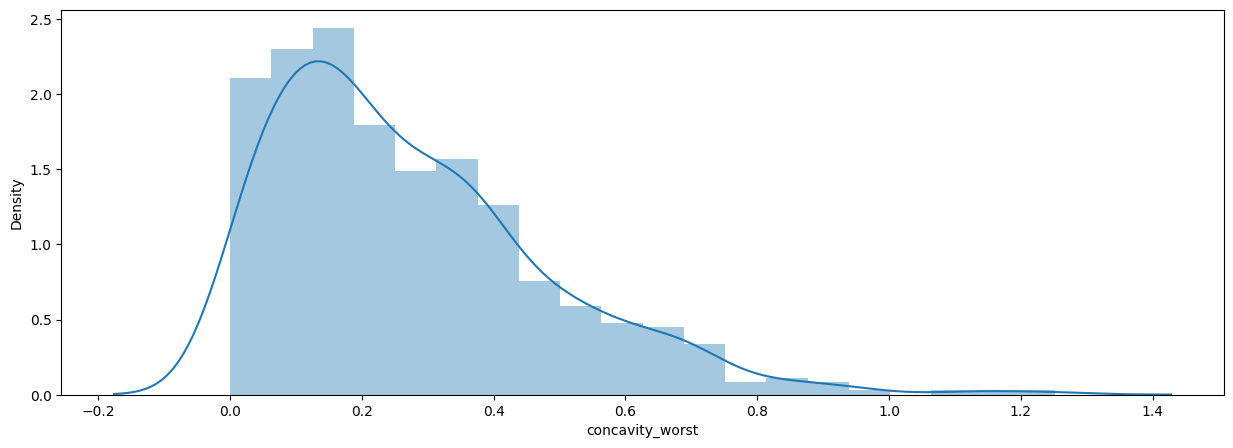

In [17]:
#Distribusi kecekungan terburuk
#concavity(Kecekungan)

plt.figure(figsize=(15,5))
sns.distplot(df['concavity_worst'])

<ipython-input-18-68a750274fb6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['perimeter_worst'])


<Axes: xlabel='perimeter_worst', ylabel='Density'>

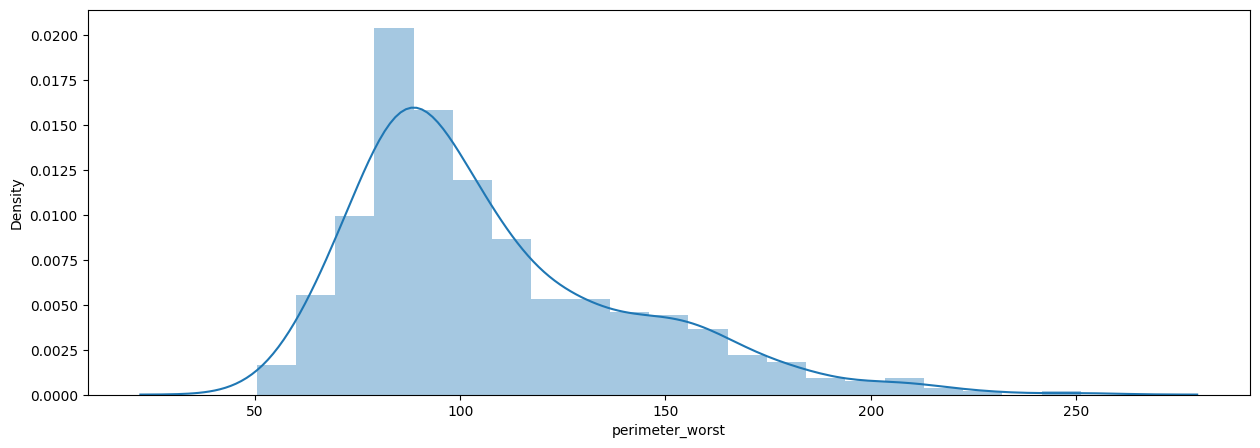

In [18]:
# DISTRUBUSI Perimeter Terburuk

plt.figure(figsize=(15,5))
sns.distplot(df['perimeter_worst'])

In [ ]:
#memisahkan data dan label
X = df.drop (columns='diagnosis', axis=1)
Y = df['diagnosis']

Pada fungsi ini saya akan memisahkan antara data lain(X) dan labelnya(diagnosis) menjadi (Y) nya

In [ ]:
print(X)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

Output dari data (X)

In [ ]:
print(Y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


Output label(Y), datanya sudah terpisah

3.standarisasi data


In [ ]:
scaler = StandardScaler()

fungsi scaler di gunakan untuk menstandarisasi data, dimana data yang akan saya standarisasi yaitu data (X)

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standarized_data = scaler.transform(X)

Fungsi untuk mentransformasi data (X)

In [ ]:
print(standarized_data)

[[-0.23640517  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [-0.23640344  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 0.43174109  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [-0.23572747  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [-0.23572517  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.24240586 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]


Output dari fungsi standarisasi data (X),dimana angka angka pada data sudah tertransporm menjadi bentuk yang sudah terskala

In [ ]:
X = standarized_data
Y = df['diagnosis']

pada kode ini kita mengecek apakah (X) sudah mejadi standarisasi atau belum

In [ ]:
print(X)
print(Y)

[[-0.23640517  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [-0.23640344  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 0.43174109  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [-0.23572747  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [-0.23572517  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.24240586 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]
0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


Output (X) menjadi standarisasi, dan label (Y)

4.memisahkan data train dan test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Fungsi untuk mengidentifikasi variabel training dan testing

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 31) (455, 31) (114, 31)


Fungsi untuk memisahkan antara data training dan data testing, yaitu data trainingnya ada 455, dan data testingnya ada 114

5.membuat data latih menggunakan SVM

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Fungsi untuk mengimplementasikan atau memasukan algoritmah svm.SVC pada data X_train dan Y_train

6.Membuat model evaluasi untuk mengukur tingkat akurasi

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

Fungsi untuk melihat akurasi training yang mencakup data X_train dan Y_train

In [ ]:
print('Akurasi data training adalah =',training_data_accuracy)

Akurasi data training adalah = 0.989010989010989


output pengecekan pada akurasi data train, yaitu sekitar 98%

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

Fungsi untuk melihat akurasi pada data testing yaitu mencakup data X_test dan Y_test

In [ ]:
print('Akurasi data testing adalah =',test_data_accuracy)

Akurasi data testing adalah = 0.9649122807017544


Output dari fungsi pengecekan akurasi data testing, akurasi yang di dapat yaitu sekitar 96%

7. membuat model prediksi

In [ ]:
input_data = (844981, 13, 21.82, 87.5, 519.8,	0.1273,	0.1932,	0.1859,	0.09353, 0.235,	0.07389, 0.3063, 1.002,	2.406, 24.32, 0.005731,	0.03502, 0.03553, 0.01226, 0.02143, 0.003749, 15.49, 30.73, 106.2, 739.3, 0.1703, 0.5401, 0.539, 0.206, 0.4378, 0.1072)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('kanker jinak')
else :
  print('kanker ganas')

[[-0.23638372 -0.32016686  0.58882978 -0.18408038 -0.38420727  2.20183876
   1.68400981  1.21909628  1.15069158  1.96559991  1.57246173 -0.35685002
  -0.389818   -0.2277434  -0.35240312 -0.43667734  0.53329023  0.12056834
   0.07524305  0.10748154 -0.0173632  -0.1613566   0.82281333 -0.03160911
  -0.24836341  1.66275699  1.81830968  1.28003453  1.39161624  2.38985717
   1.28864955]]
['M']
kanker ganas


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Kode ini di buat untuk mengecek hasil input pada dataset, dimana kita masukan data (X) dan lebel (Y) untuk melihat apakah data sesuai dengan datasetnya atau tidak

In [ ]:
#oe=OrdinalEncoder(categories=[['B','M']])
#col=['diagnosis']
#for col_n in col:
  #df[col_n]=oe.fit_transform(df[[col_n]])

jika pada saat pengecekan terjadi error pada label dikarenakan lebel pada data saya bertipe data String, bisa di ubah menjadi int64 dengan menggunakan kode berikut.

8.Simpan Model

In [ ]:
import pickle

In [ ]:
filename = 'Prediksi_Jenis_kanker_payudara.sav'
pickle.dump(classifier, open(filename,'wb'))

Fungsi untuk menyimpan file prediksi jenis kanker payudara berjenis SAV,untuk nanti saya pakai pada streamlit